In [1]:
import time
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy import stats
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
from pprint import pprint
import math
from scipy.io import arff


In [2]:
# params
seed = 42

[Описание данных](https://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data#)

In [29]:
dfs = [arff.loadarff("./Data/" + table_name) for table_name in os.listdir("./Data")]
dfs = [pd.DataFrame(data[0]) for data in dfs]

dfs_names = [table_name.replace(".csv", "") for table_name in os.listdir("./Data")]




Датасет изначально состоит из пяти таблиц. Вот какое описание дано для них в базе: 
- 1stYear â€“ the data contains financial rates from 1st year of the forecasting period and corresponding class label that indicates bankruptcy status after 5 years. The data contains 7027 instances (financial statements), 271 represents bankrupted companies, 6756 firms that did not bankrupt in the forecasting period.
- 2ndYear â€“ the data contains financial rates from 2nd year of the forecasting period and corresponding class label that indicates bankruptcy status after 4 years. The data contains 10173 instances (financial statements), 400 represents bankrupted companies, 9773 firms that did not bankrupt in the forecasting period.

И так далее. Описание немного туманное. Тем не менее, по всей видимости, таблицы нельзя считать относящимися к одним и тем же entities, поэтому мы просто вертикально сложим их, создав новую переменную table_year, чтобы отличать данные из разных таблиц. 

In [4]:
dfs_names

['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']

In [21]:
dfs_names

['1year.arff', '2year.arff', '3year.arff', '4year.arff', '5year.arff']

In [76]:
def add_year_column(data, name):
    data["table_year"] = name.replace(".arff", "")
    return data
for df_num in range(len(dfs)):
    dfs[df_num] = add_year_column(dfs[df_num], dfs_names[df_num])
df = pd.DataFrame(columns = dfs[0].columns)
for df_num in range(len(dfs)):
    df = df.append(dfs[df_num], ignore_index = True)

In [77]:
df["class"] = df["class"].str.decode("utf-8")
df["class"] = pd.to_numeric(df['class'], errors='coerce')

### Список факторов:
|    | Variable Name   | Description                                                                                                         | Unnamed: 2   |
|---:|:----------------|:--------------------------------------------------------------------------------------------------------------------|:-------------|
|  0 | Attr1           | net profit / total assets                                                                                           |              |
|  1 | Attr2           | total liabilities / total assets                                                                                    |              |
|  2 | Attr3           | working capital / total assets                                                                                      |              |
|  3 | Attr4           | current assets / short-term liabilities                                                                             |              |
|  4 | Attr5           | [(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 |              |
|  5 | Attr6           | retained earnings / total assets                                                                                    |              |
|  6 | Attr7           | EBIT / total assets                                                                                                 |              |
|  7 | Attr8           | book value of equity / total liabilities                                                                            |              |
|  8 | Attr9           | sales / total assets                                                                                                |              |
|  9 | Attr10          | equity / total assets                                                                                               |              |
| 10 | Attr11          | (gross profit + extraordinary items + financial expenses) / total assets                                            |              |
| 11 | Attr12          | gross profit / short-term liabilities                                                                               |              |
| 12 | Attr13          | (gross profit + depreciation) / sales                                                                               |              |
| 13 | Attr14          | (gross profit + interest) / total assets                                                                            |              |
| 14 | Attr15          | (total liabilities * 365) / (gross profit + depreciation)                                                           |              |
| 15 | Attr16          | (gross profit + depreciation) / total liabilities                                                                   |              |
| 16 | Attr17          | total assets / total liabilities                                                                                    |              |
| 17 | Attr18          | gross profit / total assets                                                                                         |              |
| 18 | Attr19          | gross profit / sales                                                                                                |              |
| 19 | Attr20          | (inventory * 365) / sales                                                                                           |              |
| 20 | Attr21          | sales (n) / sales (n-1)                                                                                             |              |
| 21 | Attr22          | profit on operating activities / total assets                                                                       |              |
| 22 | Attr23          | net profit / sales                                                                                                  |              |
| 23 | Attr24          | gross profit (in 3 years) / total assets                                                                            |              |
| 24 | Attr25          | (equity - share capital) / total assets                                                                             |              |
| 25 | Attr26          | (net profit + depreciation) / total liabilities                                                                     |              |
| 26 | Attr27          | profit on operating activities / financial expenses                                                                 |              |
| 27 | Attr28          | working capital / fixed assets                                                                                      |              |
| 28 | Attr29          | logarithm of total assets                                                                                           |              |
| 29 | Attr30          | (total liabilities - cash) / sales                                                                                  |              |
| 30 | Attr31          | (gross profit + interest) / sales                                                                                   |              |
| 31 | Attr32          | (current liabilities * 365) / cost of products sold                                                                 |              |
| 32 | Attr33          | operating expenses / short-term liabilities                                                                         |              |
| 33 | Attr34          | operating expenses / total liabilities                                                                              |              |
| 34 | Attr35          | profit on sales / total assets                                                                                      |              |
| 35 | Attr36          | total sales / total assets                                                                                          |              |
| 36 | Attr37          | (current assets - inventories) / long-term liabilities                                                              |              |
| 37 | Attr38          | constant capital / total assets                                                                                     |              |
| 38 | Attr39          | profit on sales / sales                                                                                             |              |
| 39 | Attr40          | (current assets - inventory - receivables) / short-term liabilities                                                 |              |
| 40 | Attr41          | total liabilities / ((profit on operating activities + depreciation) * (12/365))                                    |              |
| 41 | Attr42          | profit on operating activities / sales                                                                              |              |
| 42 | Attr43          | rotation receivables + inventory turnover in days                                                                   |              |
| 43 | Attr44          | (receivables * 365) / sales                                                                                         |              |
| 44 | Attr45          | net profit / inventory                                                                                              |              |
| 45 | Attr46          | (current assets - inventory) / short-term liabilities                                                               |              |
| 46 | Attr47          | (inventory * 365) / cost of products sold                                                                           |              |
| 47 | Attr48          | EBITDA (profit on operating activities - depreciation) / total assets                                               |              |
| 48 | Attr49          | EBITDA (profit on operating activities - depreciation) / sales                                                      |              |
| 49 | Attr50          | current assets / total liabilities                                                                                  |              |
| 50 | Attr51          | short-term liabilities / total assets                                                                               |              |
| 51 | Attr52          | (short-term liabilities * 365) / cost of products sold)                                                             |              |
| 52 | Attr53          | equity / fixed assets                                                                                               |              |
| 53 | Attr54          | constant capital / fixed assets                                                                                     |              |
| 54 | Attr55          | working capital                                                                                                     |              |
| 55 | Attr56          | (sales - cost of products sold) / sales                                                                             |              |
| 56 | Attr57          | (current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)                       |              |
| 57 | Attr58          | total costs /total sales                                                                                            |              |
| 58 | Attr59          | long-term liabilities / equity                                                                                      |              |
| 59 | Attr60          | sales / inventory                                                                                                   |              |
| 60 | Attr61          | sales / receivables                                                                                                 |              |
| 61 | Attr62          | (short-term liabilities *365) / sales                                                                               |              |
| 62 | Attr63          | sales / short-term liabilities                                                                                      |              |
| 63 | Attr64          | sales / fixed assets                                                                                                |              |

0      Attr1
1      Attr2
2      Attr3
3      Attr4
4      Attr5
       ...  
59    Attr60
60    Attr61
61    Attr62
62    Attr63
63    Attr64
Name: Variable Name, Length: 64, dtype: object

In [111]:
#get description of factors as tabulated markdown
df_names = pd.read_excel('description.xlsx', header = [0])
df_names = df_names.fillna("")
df_names["Variable Name"] = df_names["Variable Name"].str.replace("X", "Attr")
df_names["Variable Name"] = df_names["Variable Name"].str.replace(" ", "")
df_names["Variable Name"] = df_names["Variable Name"].str.upper()
#print(df_names.to_markdown())

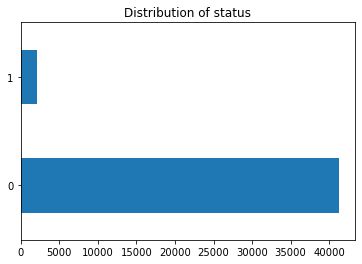

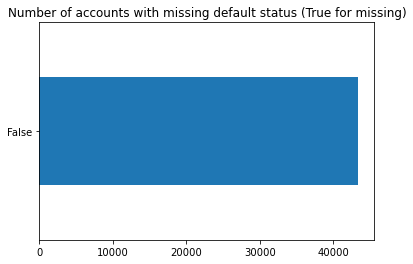

In [78]:
df["class"].value_counts().plot.barh()
plt.title("Distribution of status")
plt.show()

df["class"].isnull().value_counts().plot.barh()
plt.title("Number of accounts with missing default status (True for missing)")
plt.show()

Для единообразия нотации, создадим новую зависимую переменную target:

In [79]:
df.rename(columns = {"class":"target"}, inplace = True)

Пропуски заполнены NaN:

In [69]:
df[df.Attr1.isnull()]

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,target,table_year
1900,NaN,NaN,NaN,NaN,19866.00,NaN,NaN,NaN,0.98556,NaN,...,0.00000,1.01470,0.000000,5.20410,0.033087,0.0000,NaN,1.2531,0,1year
5334,NaN,NaN,NaN,3.6531,421.67,NaN,NaN,13.662,NaN,NaN,...,0.37071,0.81865,0.161860,2.90470,9.680500,7.3025,49.983000,1.1603,0,1year
5395,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,1.02750,NaN,...,NaN,0.97320,NaN,NaN,NaN,0.0000,NaN,NaN,0,1year
14789,NaN,NaN,NaN,2.5566,397.48,NaN,NaN,12.427,NaN,NaN,...,0.36328,0.80325,0.097957,2.99690,7.523600,11.2770,32.366000,1.0618,0,2year
30601,NaN,NaN,NaN,NaN,5172.10,NaN,NaN,NaN,1.02480,NaN,...,0.00000,0.97585,0.000000,0.45945,0.132120,0.0000,NaN,9.7091,0,4year
39278,NaN,NaN,NaN,NaN,3825.10,NaN,NaN,NaN,0.83894,NaN,...,0.00000,1.19200,0.000000,0.46523,0.150250,0.0000,NaN,3.7643,0,5year
42379,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,...,NaN,1.02200,NaN,NaN,NaN,0.0000,NaN,NaN,0,5year
43375,NaN,NaN,NaN,0.0000,-1076400.00,NaN,NaN,0.000,7.25330,NaN,...,NaN,0.13787,NaN,4.83560,NaN,25077.0000,0.014555,NaN,1,5year


Выделяем test&train сеты

In [80]:
X = df.loc[:, df.columns != 'target']
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_train.reset_index(inplace=True, drop=True)
X_test.reset_index(inplace=True, drop=True)
y_train.reset_index(inplace=True, drop=True)
y_test.reset_index(inplace=True, drop=True)


Сохраняем данные

In [ ]:
!pip install pyarrow
!pip install fastparquet

In [81]:
# Save data & info ===
# parquet is optimized for large volumes of data
!mkdir samples
X_train.to_parquet('./samples/X_train.parquet')
X_test.to_parquet('./samples/X_test.parquet')
# переводим pd.Series в pd.DataFrame для удобного экспорта
pd.DataFrame(y_train).to_parquet('./samples/y_train.parquet')
pd.DataFrame(y_test).to_parquet('./samples/y_test.parquet')

#списки категориальных и количественных переменных
df_number_of_uniques = df.nunique()
presumably_continuous = df_number_of_uniques[df_number_of_uniques >= 15]
presumably_discrete = df_number_of_uniques[df_number_of_uniques < 15]

presumably_continuous_names = list(presumably_continuous.index)
presumably_discrete_names = list(presumably_discrete.index)

with open('factors.json', 'w') as f:
    json.dump({'cat_vals': presumably_discrete_names, "num_vals": presumably_continuous_names}, f)

A subdirectory or file samples already exists.


### Статистики

Целевых событий немного.

In [83]:
print(f'Количество наблюдений: {X.shape[0]}')
print(f'Количество наблюдений, где имеются данные о дефолте или его отсутствии: {X[y.isnull() == False].shape[0]}')
print(f'Количество факторов: {X.shape[1]}')
print(f'Количество целевых событий: {y.sum()}')
print(f'Доля целевых событий: {y.sum() / X[y.isnull() == False].shape[0] * 100}%')

Количество наблюдений: 43405
Количество наблюдений, где имеются данные о дефолте или его отсутствии: 43405
Количество факторов: 65
Количество целевых событий: 2091
Доля целевых событий: 4.81741734823177%


### Пропуски

В датасете присутствуют пропуски, но их доля несущественна: больше всего их в переменной, где их 6%, но в остальных почти всегда меньше процента

In [85]:
for col in X.columns:
    print(f'Количество пропусков по фактору {col}:\n\t{X[col].isna().sum()} или {X[col].isna().sum() / df.shape[0] * 100}%')

Количество пропусков по фактору Attr1:
	8 или 0.01843105632991591%
Количество пропусков по фактору Attr2:
	8 или 0.01843105632991591%
Количество пропусков по фактору Attr3:
	8 или 0.01843105632991591%
Количество пропусков по фактору Attr4:
	134 или 0.3087201935260915%
Количество пропусков по фактору Attr5:
	89 или 0.20504550167031446%
Количество пропусков по фактору Attr6:
	8 или 0.01843105632991591%
Количество пропусков по фактору Attr7:
	8 или 0.01843105632991591%
Количество пропусков по фактору Attr8:
	94 или 0.21656491187651192%
Количество пропусков по фактору Attr9:
	9 или 0.020734938371155396%
Количество пропусков по фактору Attr10:
	8 или 0.01843105632991591%
Количество пропусков по фактору Attr11:
	44 или 0.1013708098145375%
Количество пропусков по фактору Attr12:
	134 или 0.3087201935260915%
Количество пропусков по фактору Attr13:
	127 или 0.29259301923741504%
Количество пропусков по фактору Attr14:
	8 или 0.01843105632991591%
Количество пропусков по фактору Attr15:
	36 или 0.

### Визуальный анализ

Изготовим маску для осмысленного наименования факторов:

In [116]:
from pprint import pprint 
df_names_short = df_names[["Variable Name", "Description"]][(df_names["Variable Name"] != "")&(df_names["Description"] != "")]
short_names = df_names_short["Variable Name"]
short_names = short_names.str.upper()
meaningful_names = df_names_short["Description"]
names_mask = dict(zip(short_names, meaningful_names))
names_mask["TABLE_YEAR"] = "Table of origin"
pprint(names_mask)

{'ATTR1': 'net profit / total assets',
 'ATTR10': ' equity / total assets',
 'ATTR11': ' (gross profit + extraordinary items + financial expenses) / total '
           'assets',
 'ATTR12': ' gross profit / short-term liabilities',
 'ATTR13': ' (gross profit + depreciation) / sales',
 'ATTR14': ' (gross profit + interest) / total assets',
 'ATTR15': ' (total liabilities * 365) / (gross profit + depreciation)',
 'ATTR16': ' (gross profit + depreciation) / total liabilities',
 'ATTR17': ' total assets / total liabilities',
 'ATTR18': ' gross profit / total assets',
 'ATTR19': ' gross profit / sales',
 'ATTR2': 'total liabilities / total assets',
 'ATTR20': ' (inventory * 365) / sales',
 'ATTR21': ' sales (n) / sales (n-1)',
 'ATTR22': ' profit on operating activities / total assets',
 'ATTR23': ' net profit / sales',
 'ATTR24': ' gross profit (in 3 years) / total assets',
 'ATTR25': ' (equity - share capital) / total assets',
 'ATTR26': ' (net profit + depreciation) / total liabilities',


In [114]:
X_cat = X.copy()
X_cat.columns = X_cat.columns.str.upper()

Из графиков ниже видно, что у переменных все ОЧЕНЬ плохо с выбросами. Например:

In [133]:
print(np.max(X_cat.ATTR1))
print(np.mean(X_cat.ATTR1))
print(np.std(X_cat.ATTR1))

94.28
0.03515966125815564
2.994074377215139


Их нужно будет радикально убирать

numeric


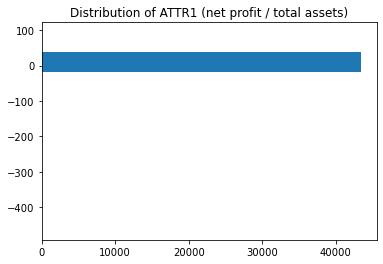

numeric


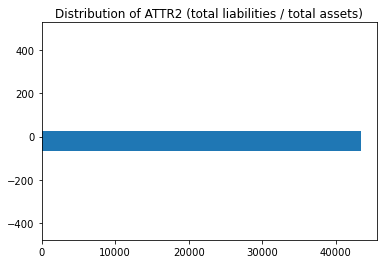

numeric


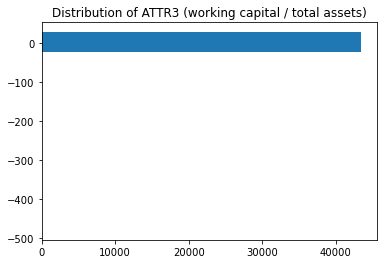

numeric


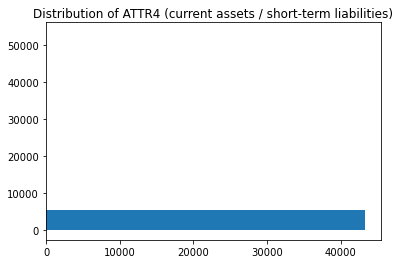

numeric


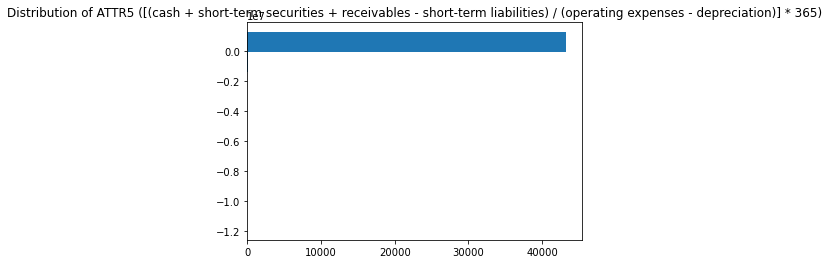

numeric


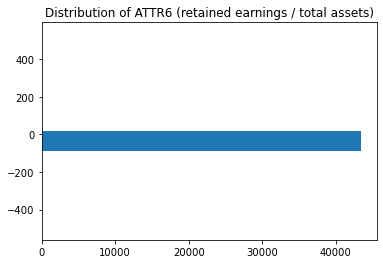

numeric


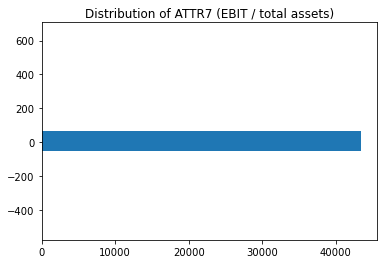

numeric


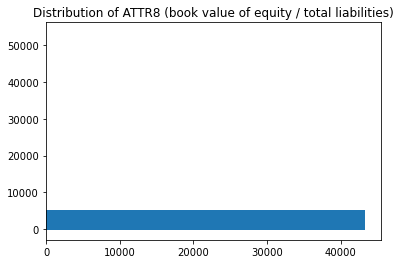

numeric


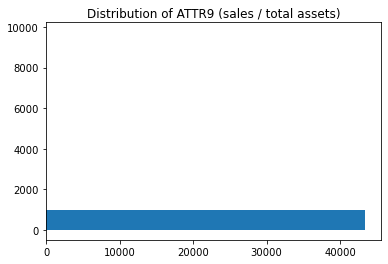

numeric


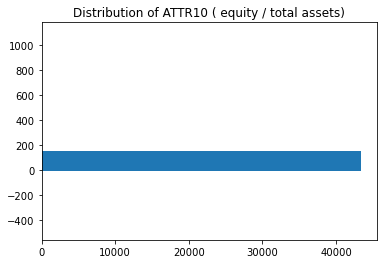

numeric


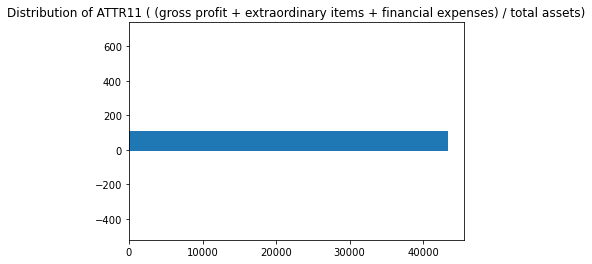

numeric


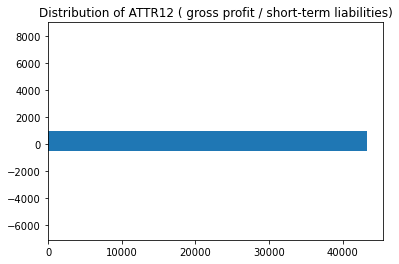

numeric


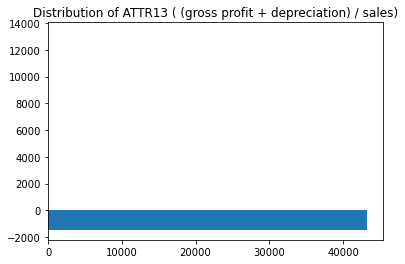

numeric


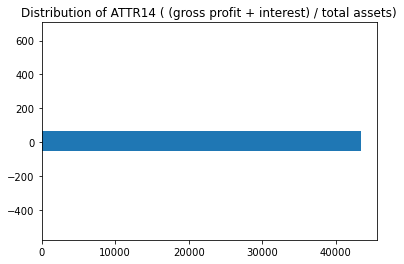

numeric


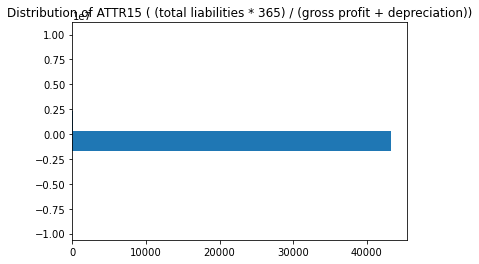

numeric


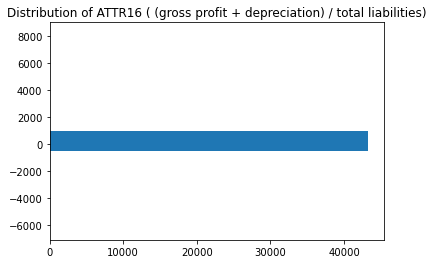

numeric


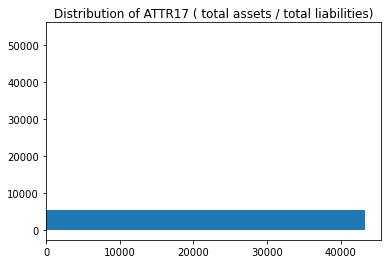

numeric


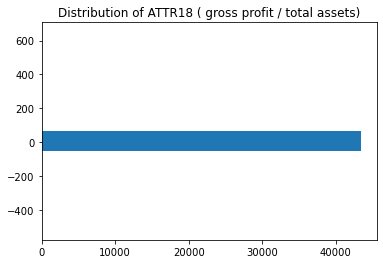

numeric


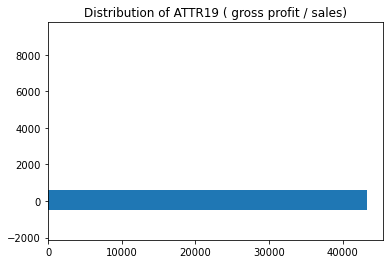

numeric


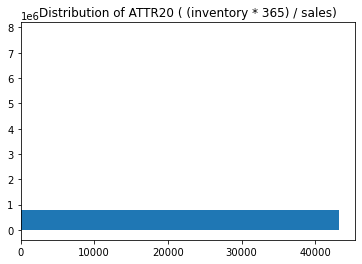

numeric


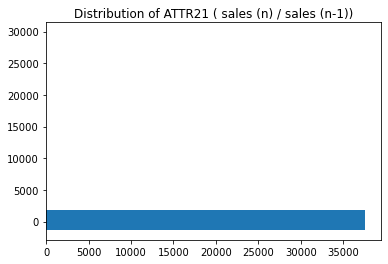

numeric


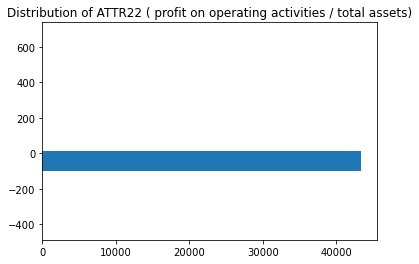

numeric


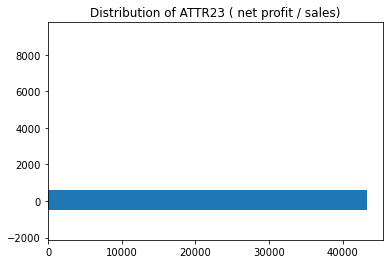

numeric


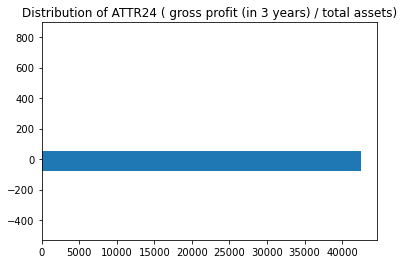

numeric


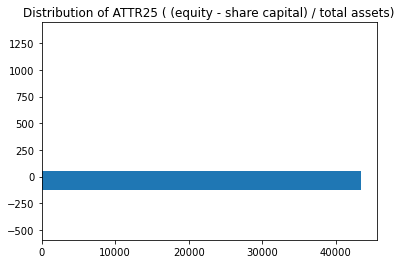

numeric


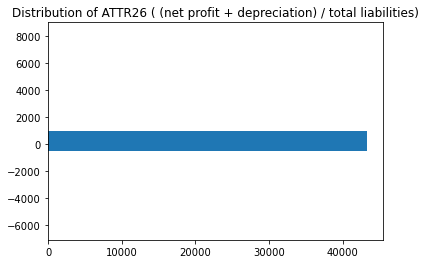

numeric


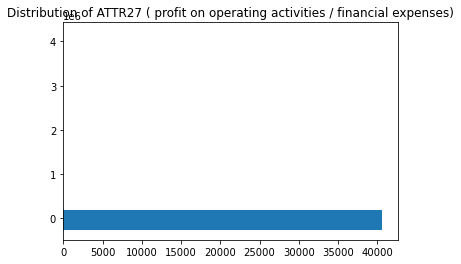

numeric


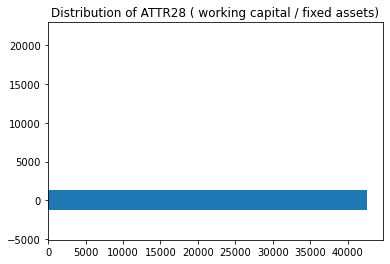

numeric


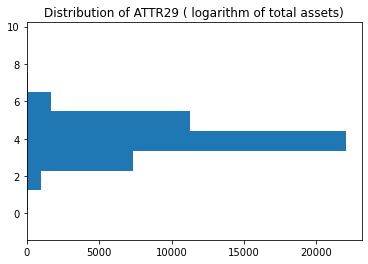

numeric


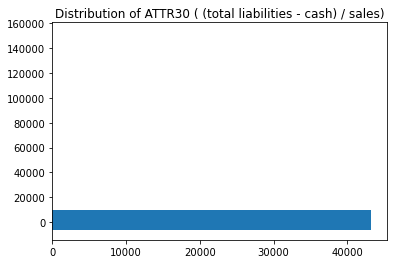

numeric


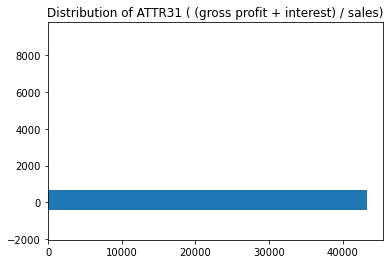

numeric


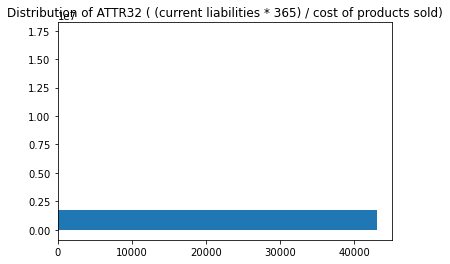

numeric


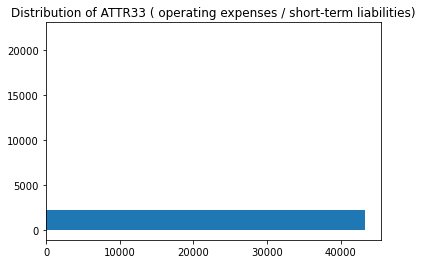

numeric


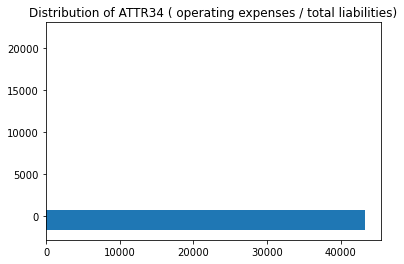

numeric


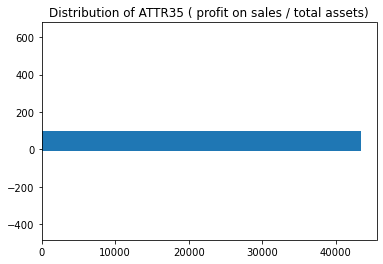

numeric


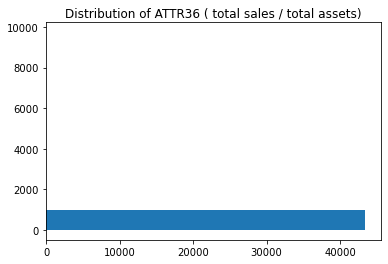

numeric


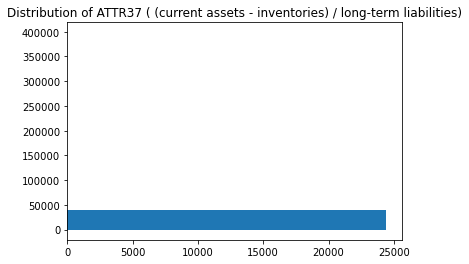

numeric


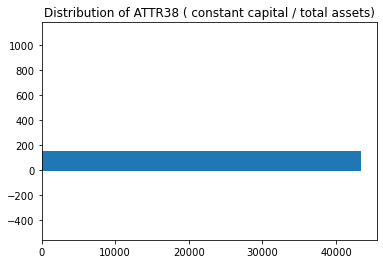

numeric


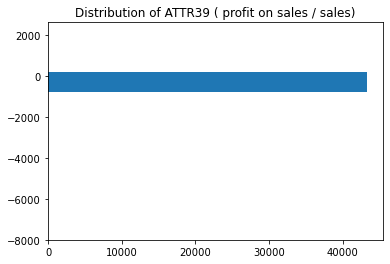

numeric


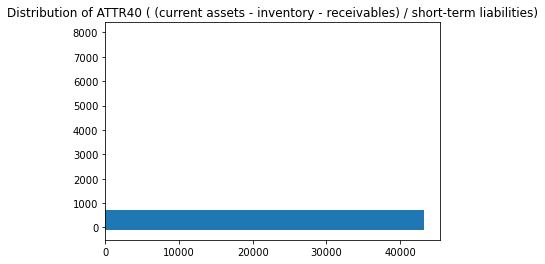

numeric


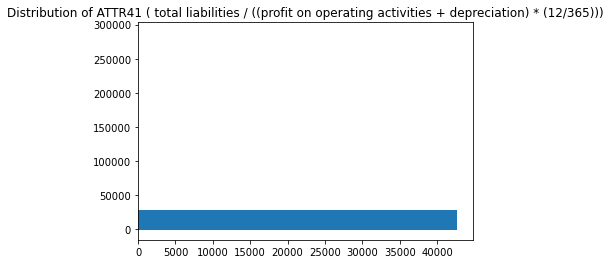

numeric


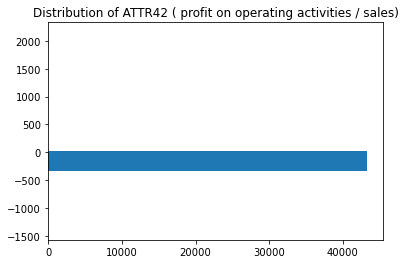

numeric


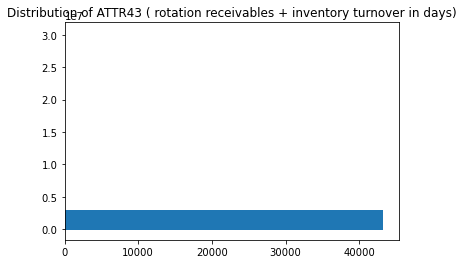

numeric


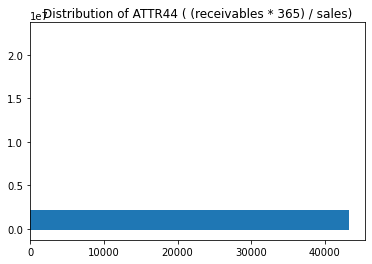

numeric


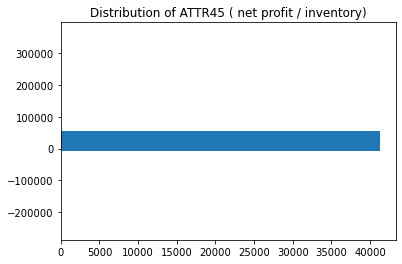

numeric


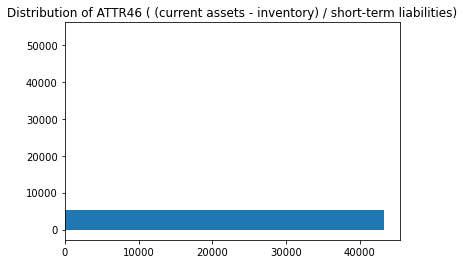

numeric


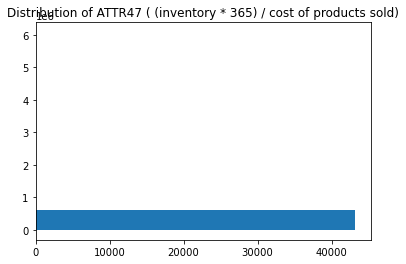

numeric


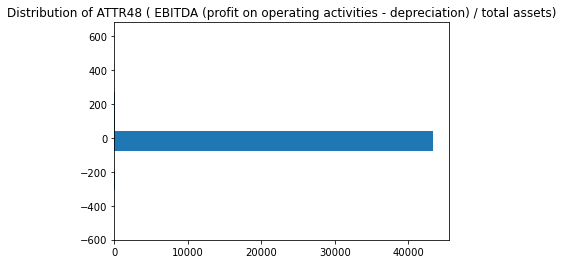

numeric


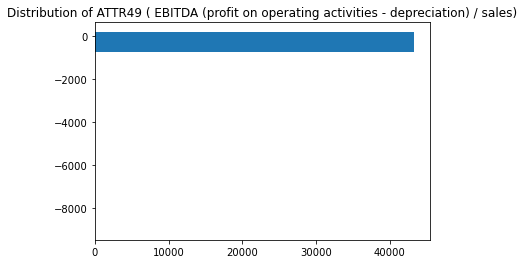

numeric


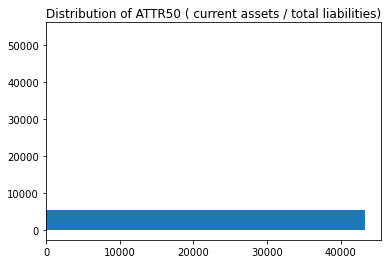

numeric


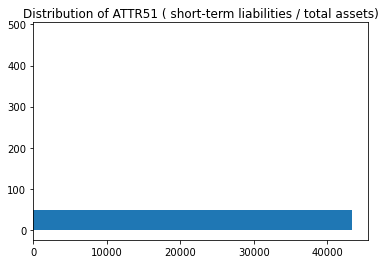

numeric


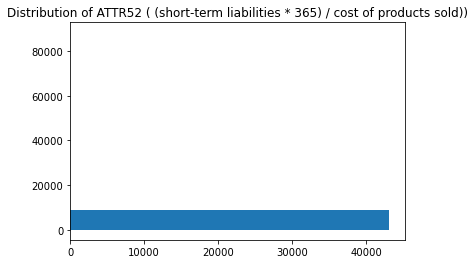

numeric


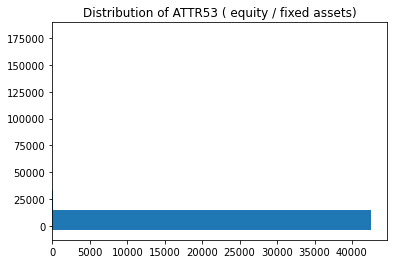

numeric


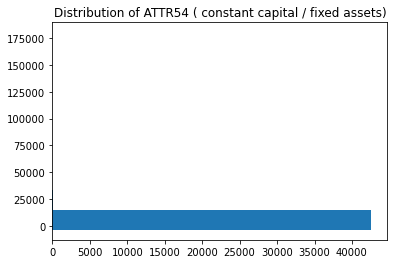

numeric


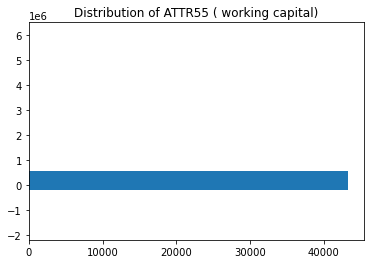

numeric


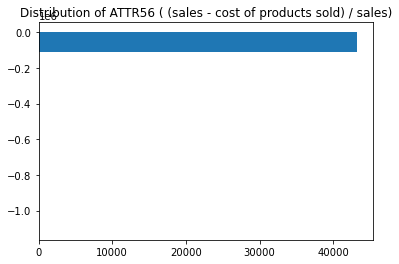

numeric


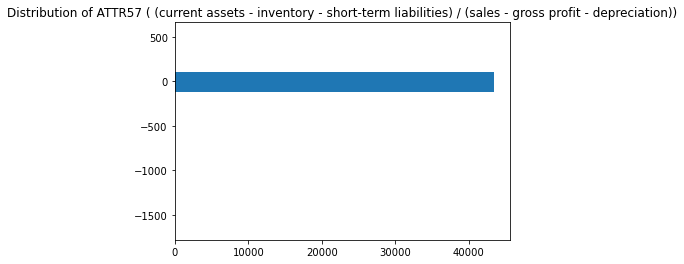

numeric


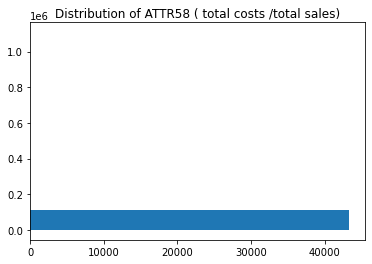

numeric


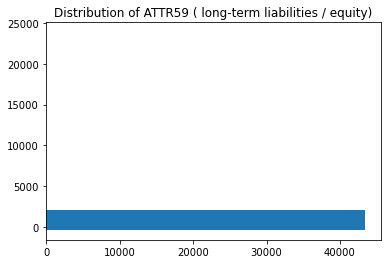

numeric


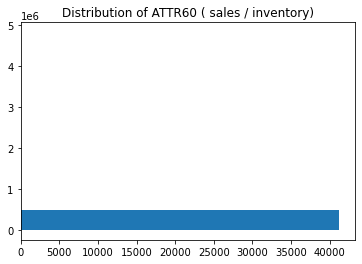

numeric


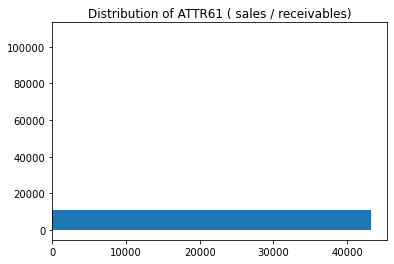

numeric


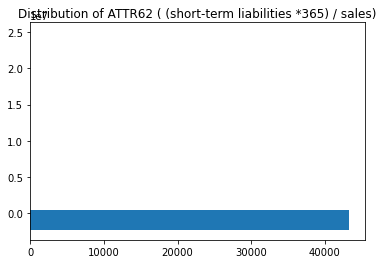

numeric


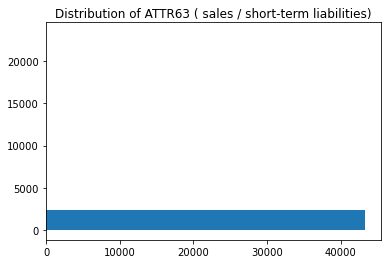

numeric


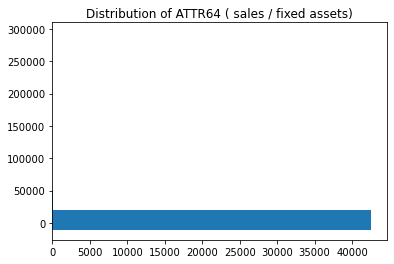

categorical


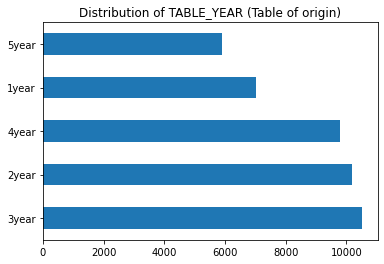

In [117]:
def plot_categorical(column, column_name, names_mask):
    column.value_counts().plot.barh()
    plt.title(f'Distribution of {column_name} ({names_mask[column_name]})')
    plt.show()

def plot_mixed(column, column_name, names_mask):
    print("This is a column mixed of both numeric and non-numeric values")
    check_numeric = column.str.isnumeric()
    check_numeric[check_numeric.isnull()] = True
    check_numeric[column.isnull()] = False

    plt.hist(column[check_numeric], orientation='horizontal')
    plt.title(f'Distribution of {column_name} ({names_mask[column_name]}) without non-numeric values')
    plt.show()

    check_numeric.value_counts().plot.barh()
    plt.title(f'Distribution of non-missing (numeric) values in {column_name} ({names_mask[column_name]})')
    plt.show()

def plot_numeric(column, column_name, names_mask):
    plt.hist(column, orientation='horizontal')
    plt.title(f'Distribution of {column_name} ({names_mask[column_name]})')
    plt.show()    

def plot_datetime(column, column_name, names_mask):
    column.hist()
    plt.title(f'Distribution of {column_name} ({names_mask[column_name]})')
    plt.show()
    
def check_mixed_or_categorical(column):
    if is_string_dtype(column) == False:
        return(False)
    else:
        check_numeric = column.str.isnumeric()
        check_numeric[check_numeric.isnull()] = True
        check_numeric[column.isnull()] = False
        if len(column[check_numeric]) == 0:
            return("categorical")
        else:
            return("mixed")

def check_factor_plotting_type(column, column_name, names_mask):
    if column.dtype == pd.Series([np.datetime64("1995-05-05")]).dtype:
        return("datetime")
    elif check_mixed_or_categorical(column) != False:
        return(check_mixed_or_categorical(column))
    else:
        return("numeric")

def plot_all(column, column_name, names_mask, presumably_discrete_names = presumably_discrete_names):
    map_functions_to_types = {
        "categorical" : plot_categorical,
        "mixed" : plot_mixed,
        "numeric" : plot_numeric, 
        "datetime" : plot_datetime
    }
    
    type_checked = check_factor_plotting_type(column, column_name, names_mask)
    print(type_checked)
    map_functions_to_types[type_checked](column, column_name, names_mask)


for col in X_cat.columns:
    
    plot_all(X_cat[col], col, names_mask)


### Выводы

Большой датасет по польским корпоратам с большим количеством переменных и низкой долей пропусков. Из недостатков нужно отметить низкую долю целевых событий (4%) и очень большие проблемы с аутлаерами.